In [9]:
import pandas as pd
# Get the CSV data here and print head
df= pd.read_csv('rating_data.csv')
df.head(10)

Unnamed: 0                                     Product_Review  Ratings
0           0  It has great sound quality and bass but after ...      1.0
1           1  [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2           2  This is a premium quality product from boAt-Li...      5.0
3           3  The boAt Rockerz line is boAt's super cheap li...      1.0
4           4  These are super comfortable and premium lookin...      5.0
5           5  Never have I seen as fragile headphone as this...      1.0
6           6  Material is very poor quality but service also...      5.0
7           7  Poor build quality. One side of the headphone ...      1.0
8           8  At 1999 they are decent.Pros1. Light weight be...      3.0
9           9  I bought this 3 months back and it's broken no...      3.0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [11]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50000 non-null  int64  
 1   Product_Review  49920 non-null  object 
 2   Ratings         50000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


In [13]:
print(df["Product_Review"].iloc[0])

It has great sound quality and bass but after (2 months) of use they got break without any falling or jerk. I was wearing it normally and it got break from one side.I call to costumer care service no. but no reply is coming, I also filed a complaint in Boat official website for warranty claim but no respond is coming from there too. And there is no service center where I can approach for my claim.So my ₹1499 are wasted now...


In [14]:
sample_review = df["Product_Review"].iloc[9]
print(sample_review)

I bought this 3 months back and it's broken now as it was all plastic and not much flexible. The product says we have 1-year warranty but physical damage isn'tincluded. Bad experience. I have fixed it with fevi quick as a temporary solution, but I don't know how much time it would work.😢


In [15]:
#These HTML Entities can be decoded by importing the html library.
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

I bought this 3 months back and it's broken now as it was all plastic and not much flexible. The product says we have 1-year warranty but physical damage isn'tincluded. Bad experience. I have fixed it with fevi quick as a temporary solution, but I don't know how much time it would work.😢


In [16]:
#since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. 

pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df["Product_Review"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[9])

I bought this 3 months back and it's broken now as it was all plastic and not much flexible. The product says we have 1-year warranty but physical damage isn'tincluded. Bad experience. I have fixed it with fevi quick as a temporary solution, but I don't know how much time it would work.😢


In [17]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  50000
Columns  :  4

Features :  ['Unnamed: 0', 'Product_Review', 'Ratings', 'preprocessed']

Missing values :   160

Unique values :  
 Unnamed: 0        50000
Product_Review     8281
Ratings               5
preprocessed       8281
dtype: int64


In [18]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50000 non-null  int64  
 1   Product_Review  49920 non-null  object 
 2   Ratings         50000 non-null  float64
 3   preprocessed    49920 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


Unnamed: 0         0
Product_Review    80
Ratings            0
preprocessed      80
dtype: int64

In [19]:
#Handling the missing values for product review
drop_na = ["Product_Review"]

for i in drop_na:
    print (i, ":", round((df[i].isna().sum()/df.shape[0])*100, 2))

Product_Review : 0.16


In [20]:
df = df.dropna(subset=drop_na, axis=0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49920 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      49920 non-null  int64  
 1   Product_Review  49920 non-null  object 
 2   Ratings         49920 non-null  float64
 3   preprocessed    49920 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [22]:
df['Product_Review'].value_counts()[10:50]

I got it for 24k in offer and believe me its a no brainer just go for it in this price no canon camera is equal to it lov d it and buyed 50mm prime lens and my kit is complete now. Fine quality with super fine pics.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

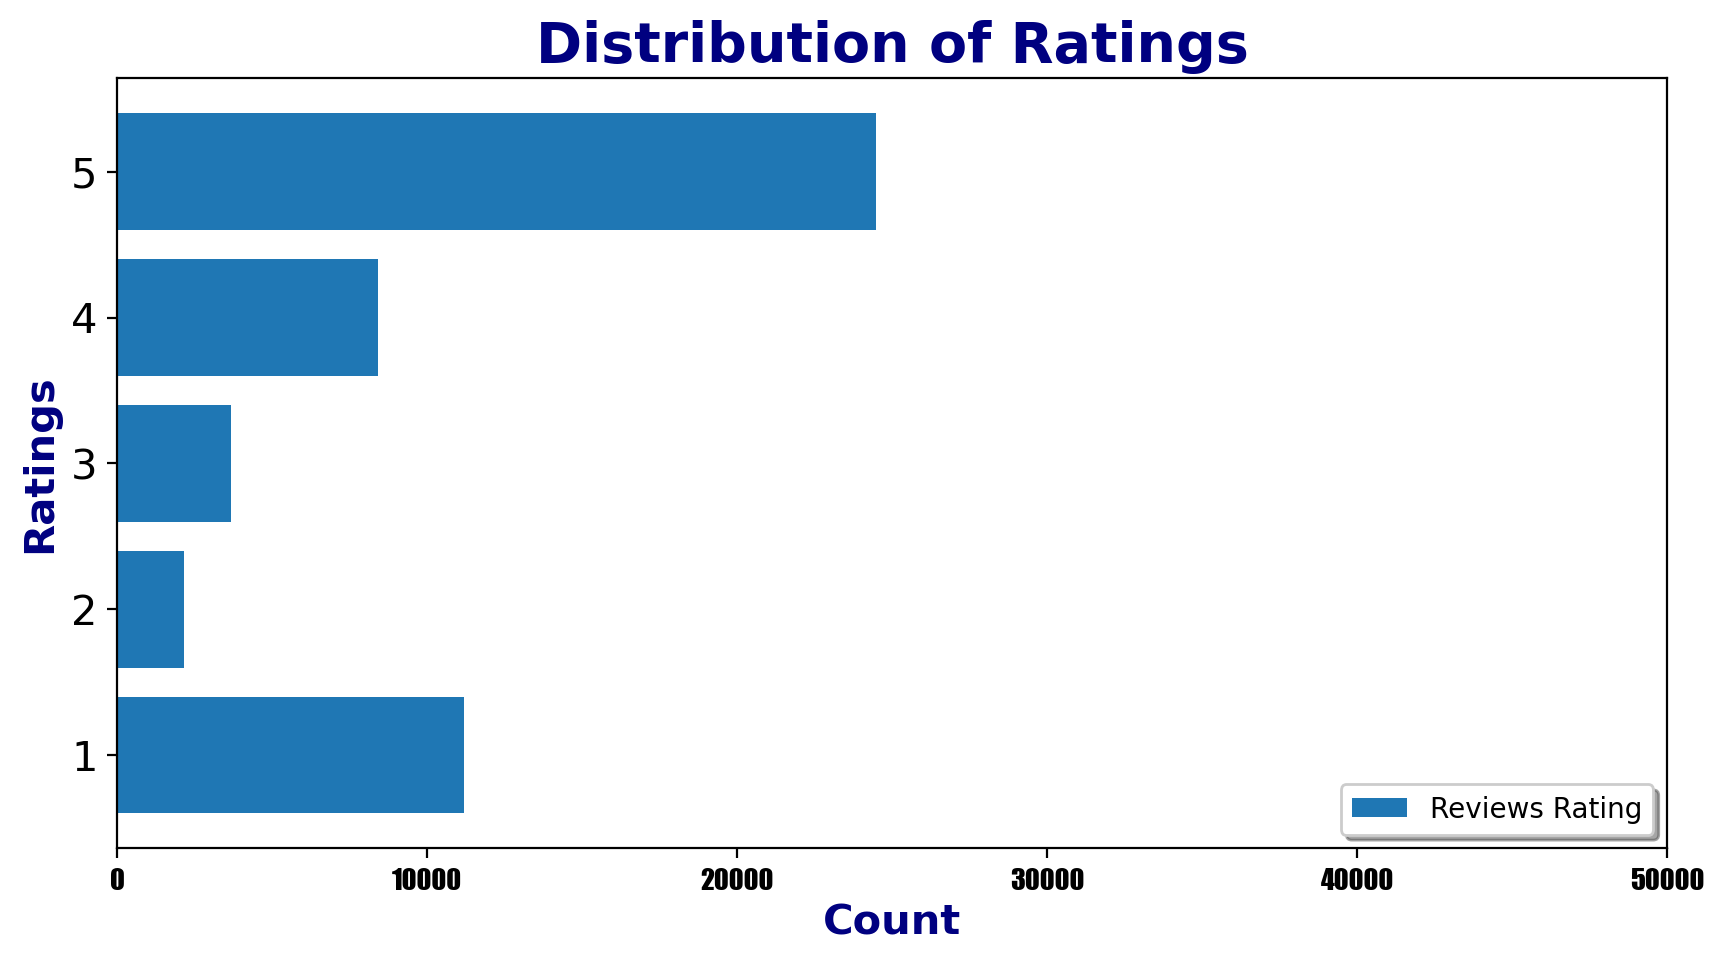

In [23]:
#rating distribution
# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['Ratings'].value_counts().index )
y = list( df['Ratings'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'], shadow=True, loc=4)
# loc=1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle

# plt.grid()   # add grid lines

In [24]:
!pip install WordCloud

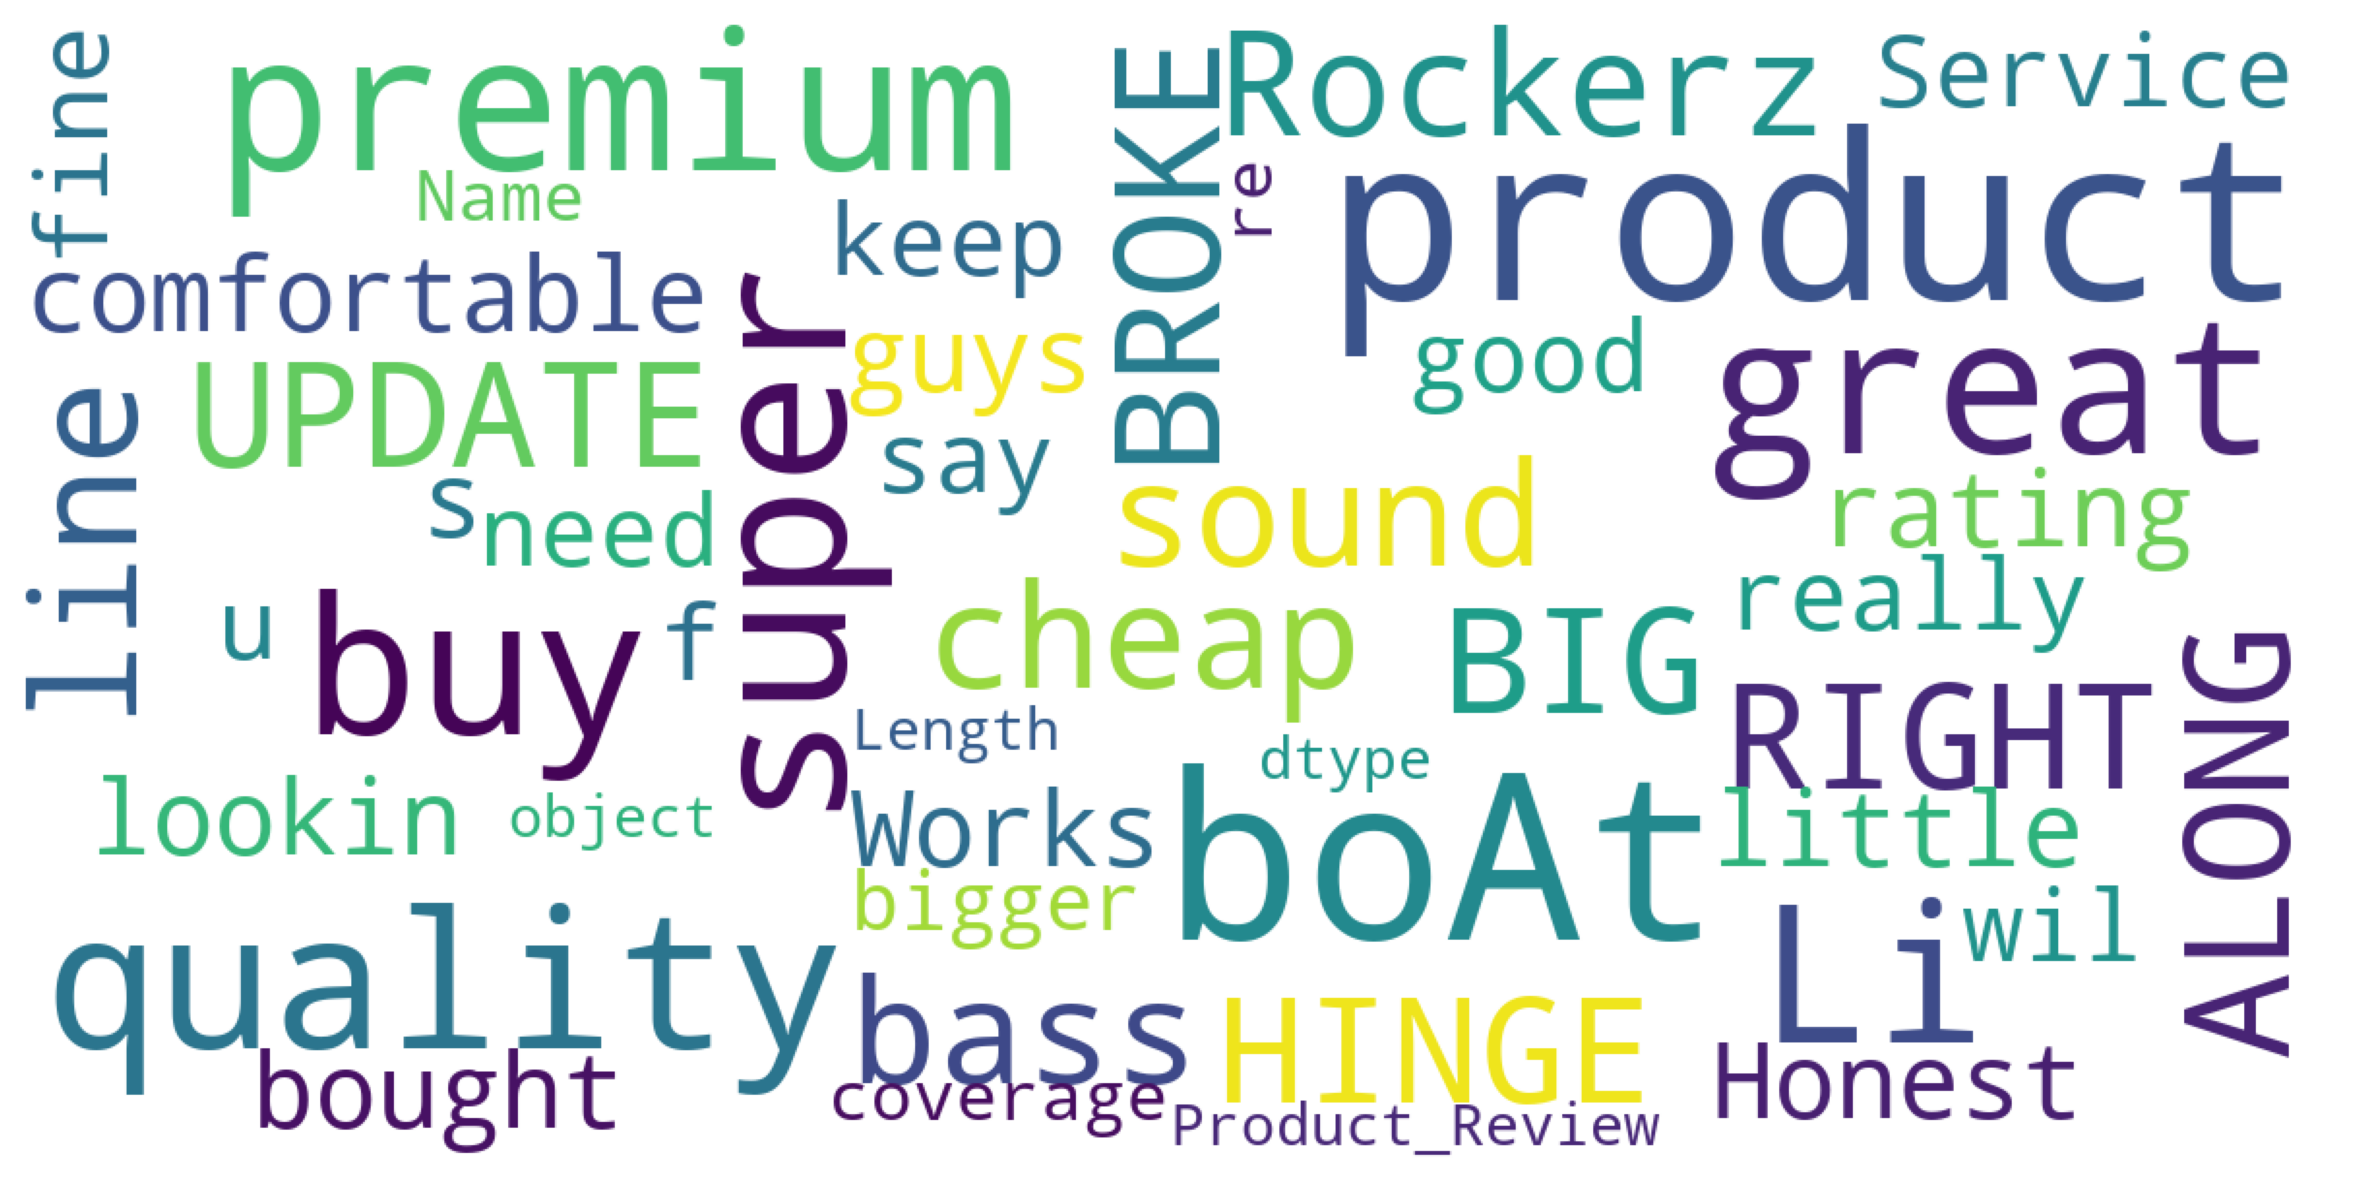

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Product_Review'])

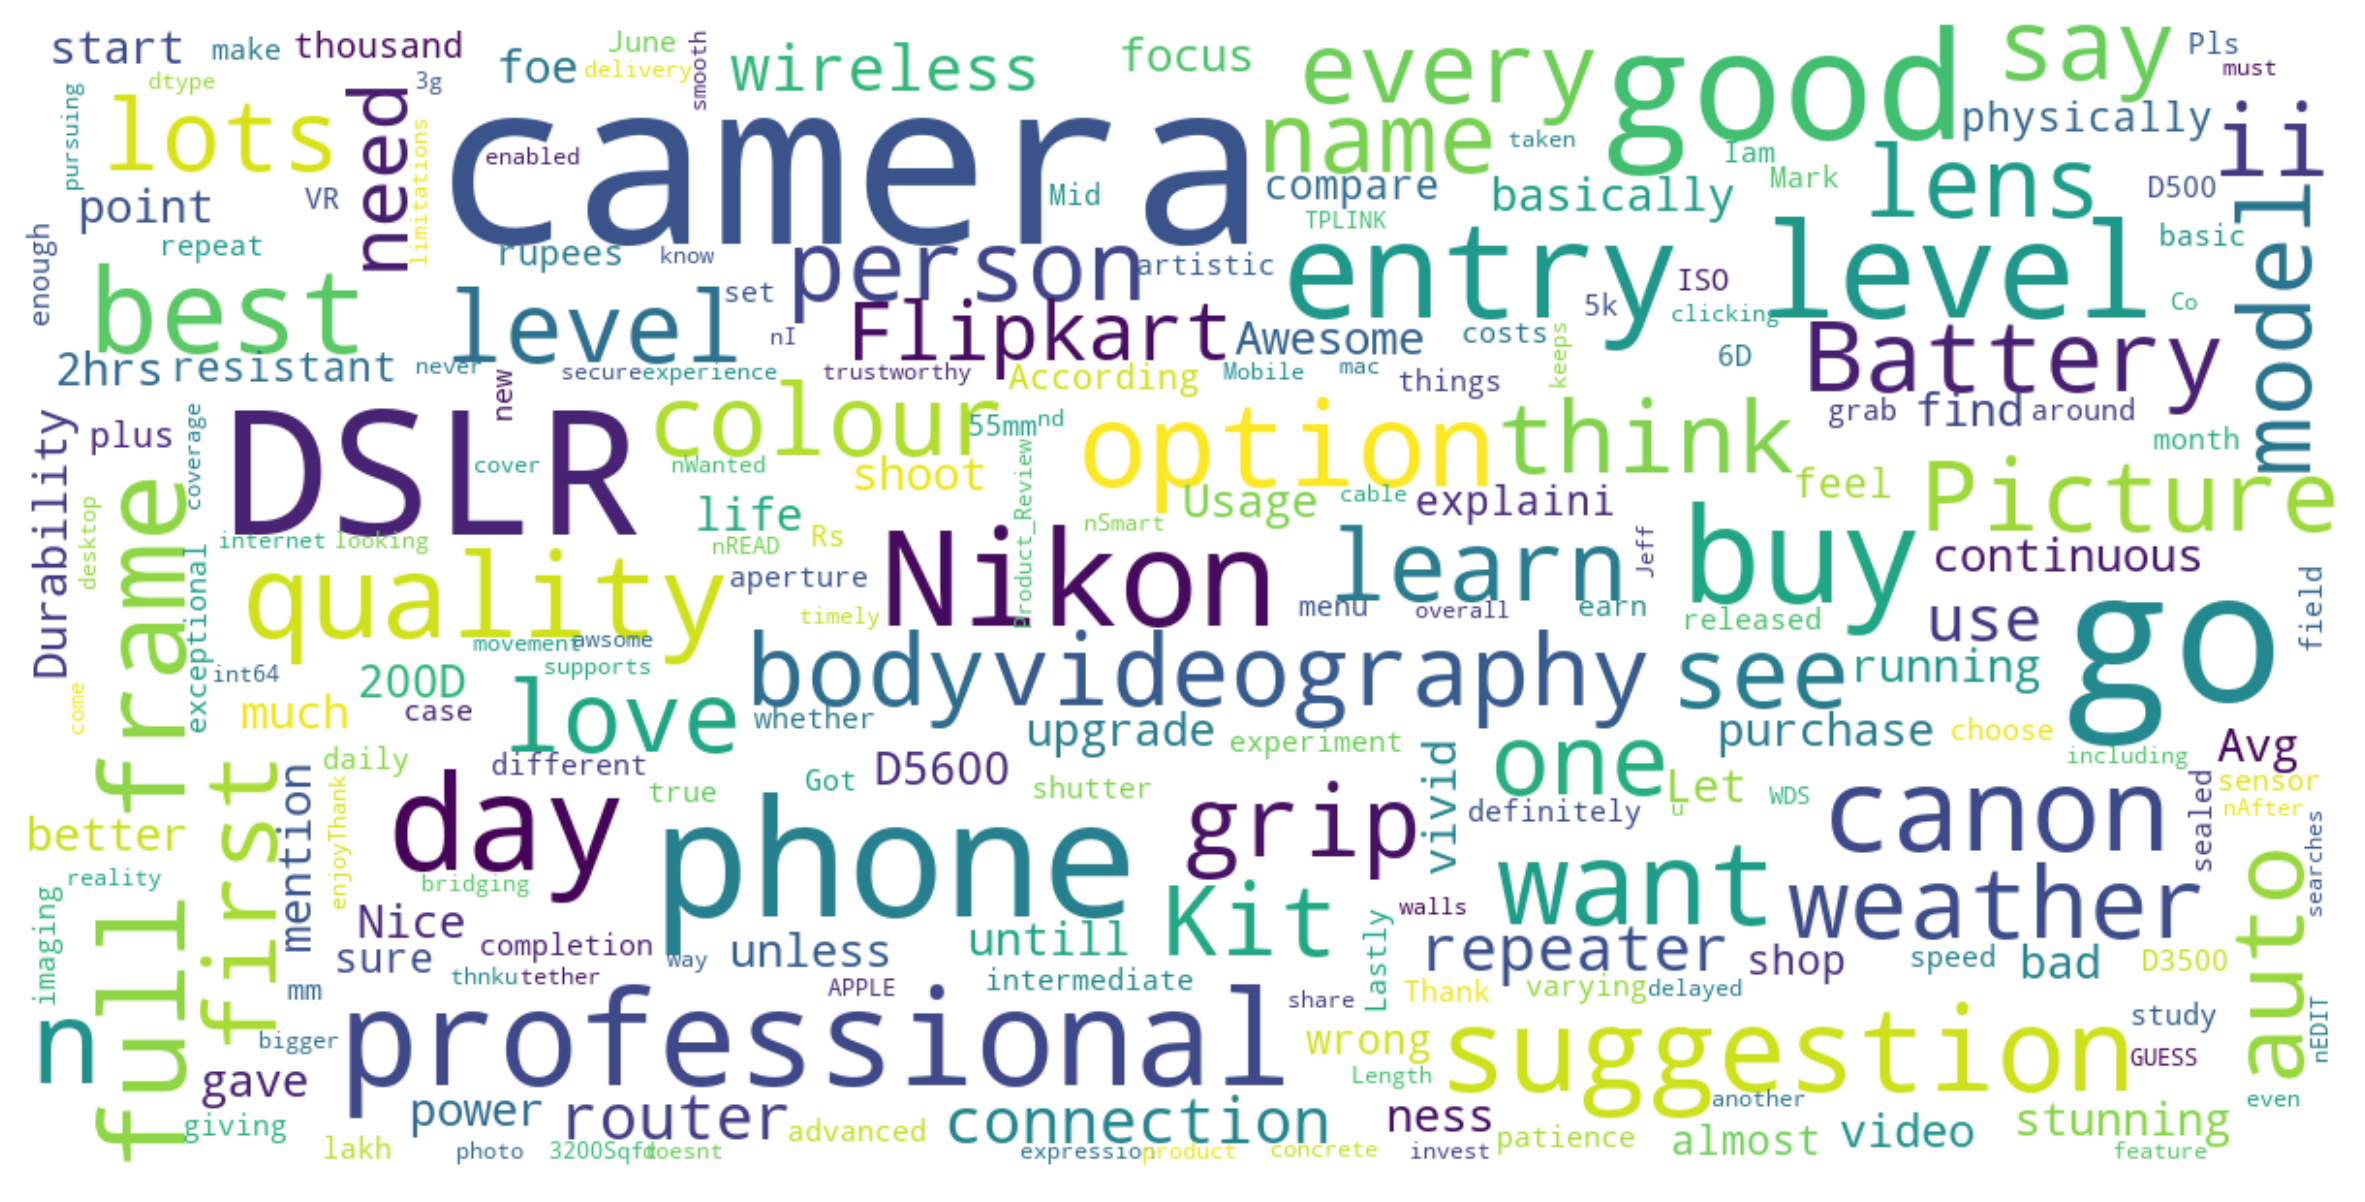

In [26]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Product_Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

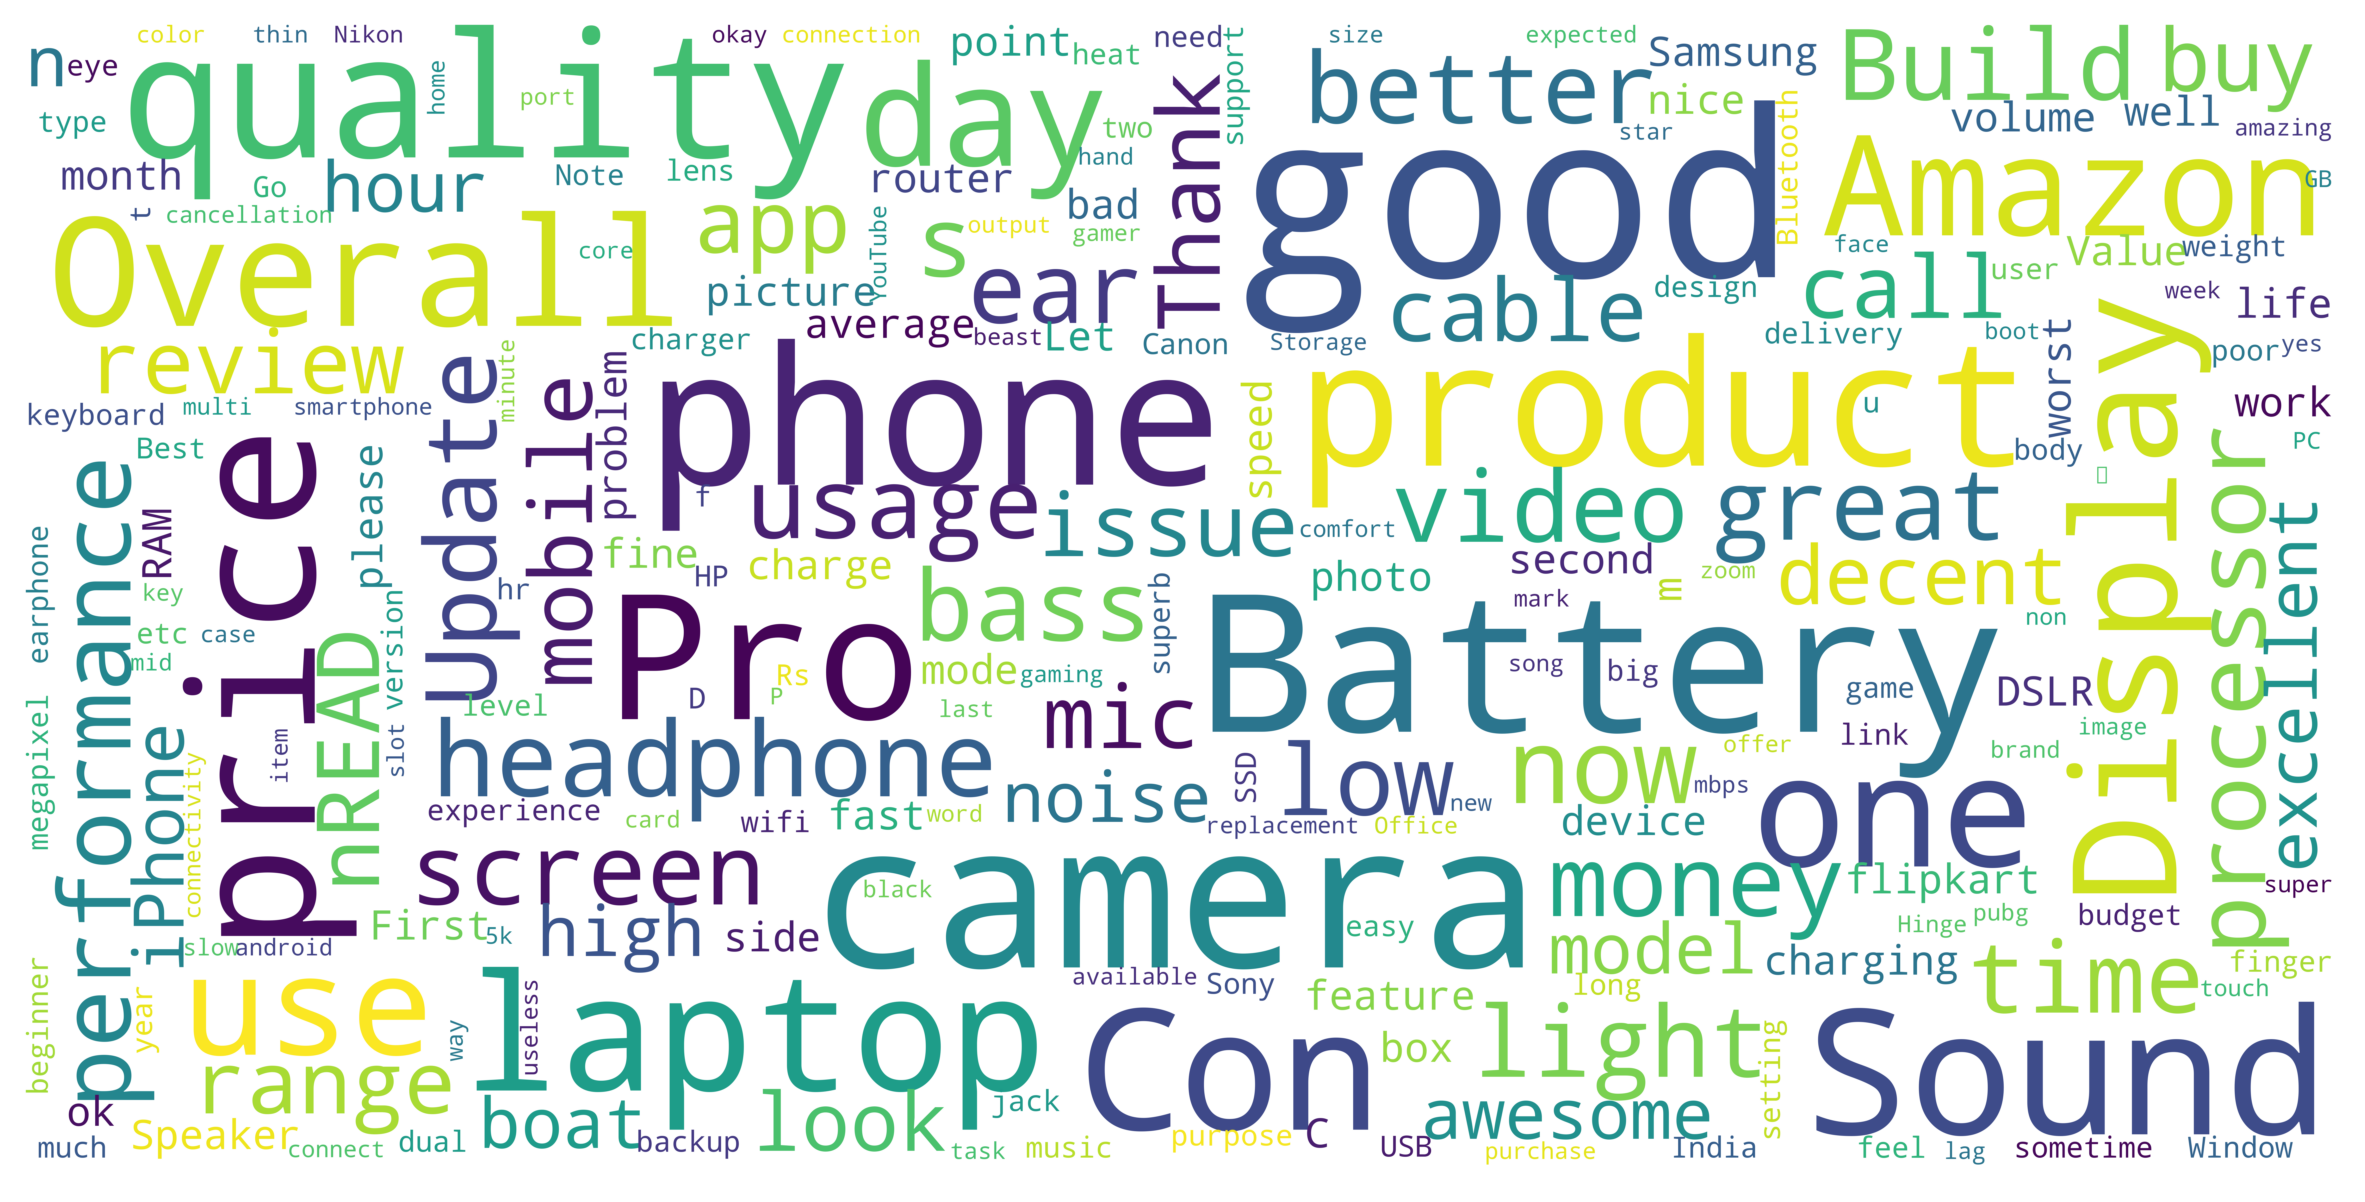

In [27]:
# try to tokenize to individual word (uni-gram) - Product_Review
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Product_Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
len(big_list)

3738847

In [29]:
df['Ratings'].value_counts()

5.0    24491
1.0    11186
4.0     8404
3.0     3671
2.0     2168
Name: Ratings, dtype: int64

In [30]:
#the highest ratng is the 5 star rating followed by 4 star

In [31]:
#prediction of ratings
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['Product_Review']
# train_text=df['reviews.text']
y=df['Ratings']

In [32]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  # try 1,3
#     max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [33]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [34]:
import time   # time1 = time.time(); time2 = time.time(); time_taken = time2 - time1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (34944, 213953)
y_train (34944,)
X_test (14976, 213953)
y_test (14976,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train,y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 2246.43 seconds


In [38]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.913795405982906
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97      3535
         2.0       0.93      0.98      0.95       613
         3.0       0.76      0.94      0.84       836
         4.0       0.70      0.94      0.81      1844
         5.0       0.97      0.88      0.92      8148

    accuracy                           0.91     14976
   macro avg       0.87      0.94      0.90     14976
weighted avg       0.93      0.91      0.92     14976

[[3380   35   25   20   75]
 [   9  601    0    1    2]
 [   4    0  788    8   36]
 [  13    0    4 1742   85]
 [  27   13  223  711 7174]]


In [42]:
!pip install xgboost 

     -------------------------------------- 125.4/125.4 MB 6.0 MB/s eta 0:00:00


In [45]:
#Model 2: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [46]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 221.74 seconds


In [47]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.9146634615384616
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97      3559
         2.0       0.93      0.98      0.95       613
         3.0       0.76      0.97      0.85       811
         4.0       0.69      0.96      0.81      1778
         5.0       0.98      0.88      0.93      8215

    accuracy                           0.91     14976
   macro avg       0.87      0.95      0.90     14976
weighted avg       0.93      0.91      0.92     14976

[[3380   35   29   23   92]
 [   9  601    0    1    2]
 [   4    0  786    5   16]
 [  13    0    4 1715   46]
 [  27   13  221  738 7216]]


In [2]:
pip install DecisionTree

Note: you may need to restart the kernel to use updated packages.


In [36]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_train = DT.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9564159798534798
Test accuracy is 0.8898904914529915
[[3380    9    4   13   27]
 [  35  601    0    0   13]
 [  26    0  799   34  181]
 [  28    2   33 1825  594]
 [ 107    4  135  404 6722]]
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96      3433
         2.0       0.98      0.93      0.95       649
         3.0       0.82      0.77      0.79      1040
         4.0       0.80      0.74      0.77      2482
         5.0       0.89      0.91      0.90      7372

    accuracy                           0.89     14976
   macro avg       0.89      0.87      0.88     14976
weighted avg       0.89      0.89      0.89     14976



In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred_train = ada.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))